In [1]:
%matplotlib inline
import sklearn.model_selection
import sklearn.neighbors
import sklearn.linear_model
from sklearn.tree import DecisionTreeClassifier 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas as pd
import patsy
import sklearn
msamples = pd.read_csv('agaricus-lepiota.csv')

# Poisonous Mushroom Classification (Final Project)
# Introduction to Data Science Algorithms
# CSCI 3022

# Andrew Rendler
<br>
<br>
<br>










# The Data







### Dataset Selection:
For this project I chose to use the 'Mushroom Data Set' found on UCI Machine Learning Repository https://archive.ics.uci.edu/ml/datasets/mushroom. The

information found in this dataset originated from The Audubon Society Field Guide to North American Mushrooms (1981). G. H. Lincoff (Pres.), New York: Alfred A.

Knopf, it is comprised of 22 attributes, all categorical features, as follows:


    
- Edible or Poisonous !! This will be my target feature in the classification exercise !!
- Cap Shape (bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s)
- Cap Surface (fibrous=f,grooves=g,scaly=y,smooth=s)
- Cap Color (brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y)
- Whether or not the flesh of the mushroom bruises, or discolors when crushed or abraided (bruises=t,no=f)
- Whether the mushroom has an odor (almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s)
- Gill Attachement (attached=a,descending=d,free=f,notched=n)
- Gill Spacing (close=c,crowded=w,distant=d)
- Gill Size (broad=b,narrow=n)
- Stalk Shape (enlarging=e,tapering=t)
- Stalk Root (bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=?)
- Stalk Surface Above Ring (where the veil meets the stalk) (fibrous=f,scaly=y,silky=k,smooth=s)
- Stalk Surface Below Ring (where the veil meets the stalk) (fibrous=f,scaly=y,silky=k,smooth=s)
- Stalk Color Above Ring (brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y)
- Stalk Color Below Ring (brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y)
- Veil Type (partial=p,universal=u)
- Veil Color (brown=n,orange=o,white=w,yellow=y)
- Ring Number (none=n,one=o,two=t)
- Ring Type (cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z)
- Spore Print Color (black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y)
- Population (abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y)
- Habitat (grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d)
    
The dataset contains 8124 unique observations, each record describes a hypothetical sample corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family.
    
### Dataset Integrity: 
I am confident in the quality of this information, as it is a set of information scraped from a highly trusted resource, The Audubon Society Field Guide to North

American Mushrooms. From my cursory review, there are a few records where one or more features are null, this is denoted by '?'. I will make a determination as 

to whether I exclude those records once I start to narrow down which features I apply to the solution. There is really no opportunity to replace this value with 

a calculation, so exclusion would be the only option. There are also 50+ research papers referencing this dataset, so it is not untested or obscure. I do not

think that this dat requires transformation or outliers that need cleaning.


### Preview of Data

In [2]:
msamples[:5]

,edible,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


<br>
<br>
<br>

# Problem Statement and Approach:

The problem is simple - Identify a set of attributes, that could be reasonably measured or observed by the average human, that would allow said individual to 
make a determination as to whether a mushroom found in the wild is edible. I want to be clear: this is not something that I would recommend anyone 
use in practice, but moreso - can it be done? I am confident that this can be done using at most 3 features. 
<br>
<br>
I think that this problem is interesting because I love hunting mushrooms. Colorodo has plentiful edible mushrooms in every season but winter (though sometimes the morels pop early, in mid March, and that is technically winter), and over the years I have learned to identify quite a few varieties, including some poisonous lookalikes. I think that this specific dataset is interesting because agaricus is very common (the common 'table' white button mushroom is agaricus genus), but some are fatally poisonous to humans. I would also like to test some personal 'anecdotal' rules that I have learned about identifying poisonous mushrooms, namely the cap color and odor. If the cap is red or vibrantly colored, it is likely poisonous - or if it smells bad or spicy, dont eat it. Though this doesn't apply to the prized matsutake, which smell of cinnamon, or lobster mushrooms with their vibrant red flesh. This nuanced identification method is one of the reasons that identifying mushrooms can be risky, there is no easy to follow rule. This is even more apparent with agaricus, two mushrooms can look almost identical, one will be delicious cooked in butter and the other will kill you.
<br>
<br>
- Agaricus silvicola (great cooked in butter)
- Amanita bisporigera (will definitely kill you)
<br>
<br>

There is almost no distinction when comparing the two.
<br>
<br>
My approach will be classification, with the target feature being 'Edible or Poisonous'- I would like to achieve a score of > 99.9% accuracy in this classification. I will use methods such as logistic regression and k-nearest neighbors.
<br>
<br>
<br>


# Exploratory Data Analysis

Since these are all categorical variables I am limited in the representations that I can use to represent, and since I am trying to identify a relationship between a few of the explantory features contained in the dataset and the variable 'edible', I want to see if there are any patterns between each features distribution between the two characteristics contained within the edible variable - p (poisonous) and e (edible). I will do this with a series of bar plots.



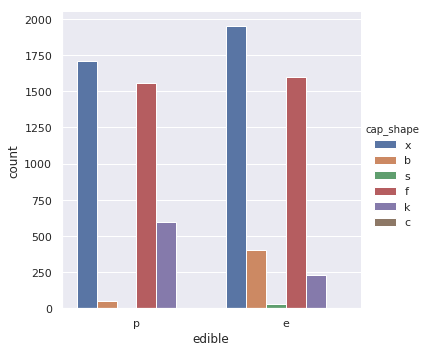

In [3]:
sns.catplot(x="edible", y= None, hue="cap_shape", kind="count", data=msamples);

# It is unlikely that this is a good candidate for an explanatory variable, as the distribution of cap 
#shape between poisonous and edible is uniform between several cap_shape characteristics (x,f)

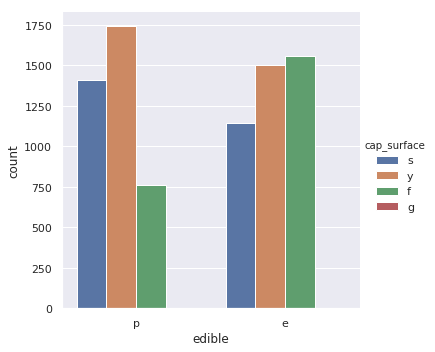

In [4]:
sns.catplot(x="edible", y= None, hue="cap_surface", kind="count", data=msamples);

# It is unlikely that this is a good candidate for an explanatory variable, as the distribution of cap 
#surface between poisonous and edible is uniform between several cap_surface characteristics (all)

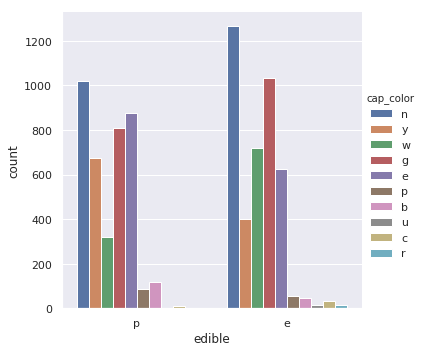

In [5]:
sns.catplot(x="edible", y= None, hue="cap_color", kind="count", data=msamples);

# Contrary to my anecdotal rule, it is unlikely that this is a good candidate for an explanatory variable, as the distribution of cap 
#color between poisonous and edible is uniform between several cap_color characteristics (all)

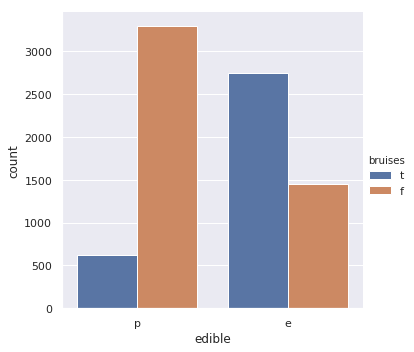

In [6]:
sns.catplot(x="edible", y= None, hue="bruises", kind="count", data=msamples);

# This one might actually be a beneficial option, it appears as if most edible mushrooms bruise. I dont think this will get us all the way, but it could help 
#close a gap to my >99.9% score goal. 

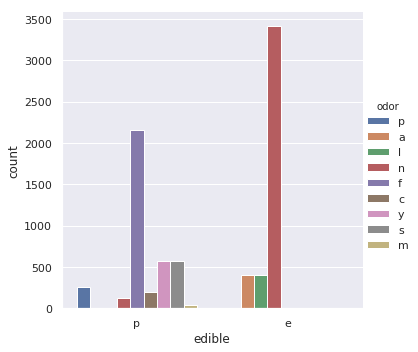

In [7]:
sns.catplot(x="edible", y= None, hue="odor", kind="count", data=msamples);

# This looks like another good explanatory variable too. There is very little overlap here. This supports my anecdotal rule, that if it smells bad, dont eat it.

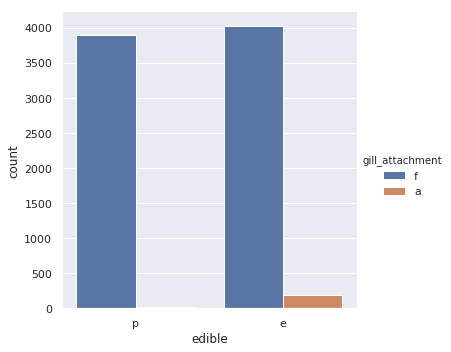

In [8]:
sns.catplot(x="edible", y= None, hue="gill_attachment", kind="count", data=msamples);

# This could be marginally helpful - you know if gill attachment = a, it is edible

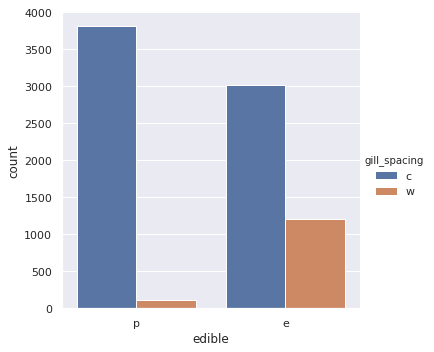

In [9]:
sns.catplot(x="edible", y= None, hue="gill_spacing", kind="count", data=msamples);

# It is unlikely that this is a good candidate for an explanatory variable, as the distribution of  
#gill spacing between poisonous and edible is uniform between the two characteristics (c)

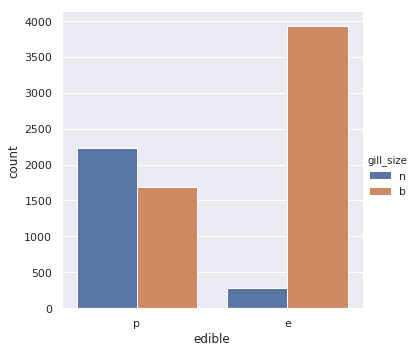

In [10]:
sns.catplot(x="edible", y= None, hue="gill_size", kind="count", data=msamples);

# It is unlikely that this is a good candidate for an explanatory variable, as the distribution of  
#gill size between poisonous and edible is uniform between the two characteristics (b)

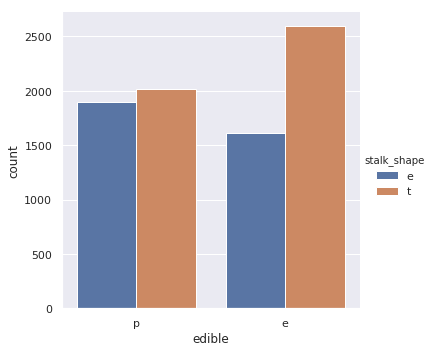

In [11]:
sns.catplot(x="edible", y= None, hue="stalk_shape", kind="count", data=msamples);

# Nope. Stalk Shape is Definitely not meaningful

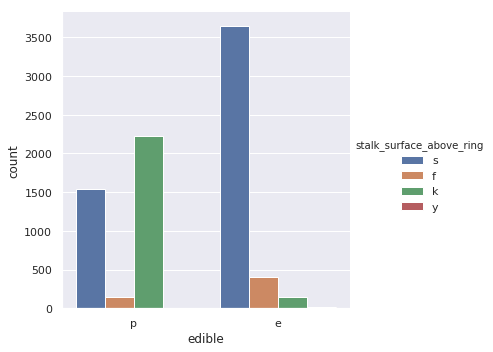

In [12]:
sns.catplot(x="edible", y= None, hue="stalk_surface_above_ring", kind="count", data=msamples);

# It is unlikely that this is a good candidate for an explanatory variable, as the distribution of  
#stalk surface above ring characteristics between poisonous and edible is uniform

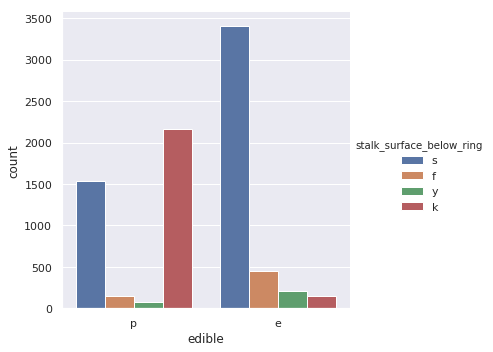

In [13]:
sns.catplot(x="edible", y= None, hue="stalk_surface_below_ring", kind="count", data=msamples);

# This could be marginally helpful, >2000 samples have stalk surface below ring = k where it is poisonous, and there are much fewer samples found with the same 
# characteristics that are edible.

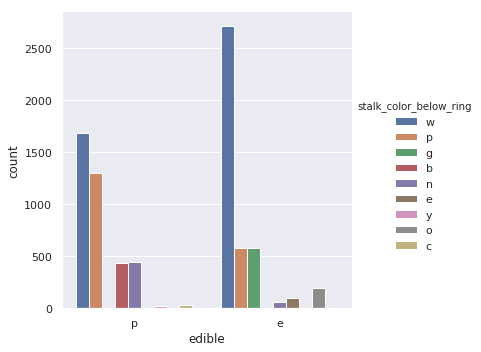

In [14]:
sns.catplot(x="edible", y= None, hue="stalk_color_below_ring", kind="count", data=msamples);

# It is unlikely that this is a good candidate for an explanatory variable, as the distribution of  
#stalk color below ring characteristics between poisonous and edible is uniform

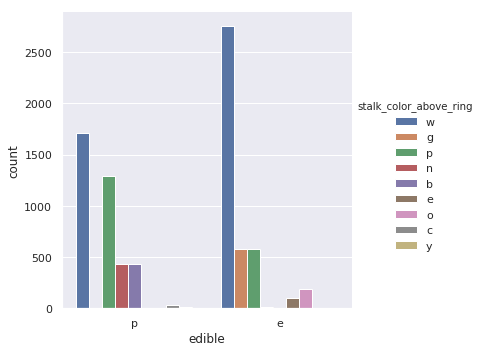

In [15]:
sns.catplot(x="edible", y= None, hue="stalk_color_above_ring", kind="count", data=msamples);

# The variability of the color, from above to below the ring, is low so you wouldnt exect a different response. It is unlikely that this 
#is a good candidate for an explanatory variable, as the distribution of  
#stalk color above ring characteristics between poisonous and edible is uniform

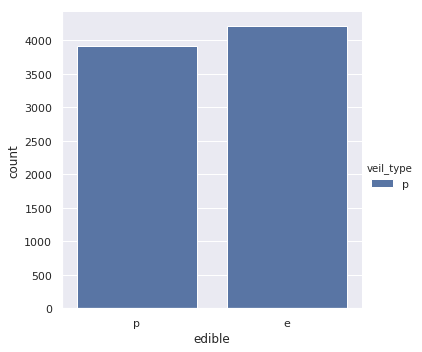

In [16]:
sns.catplot(x="edible", y= None, hue="veil_type", kind="count", data=msamples);

# No, this one wont work

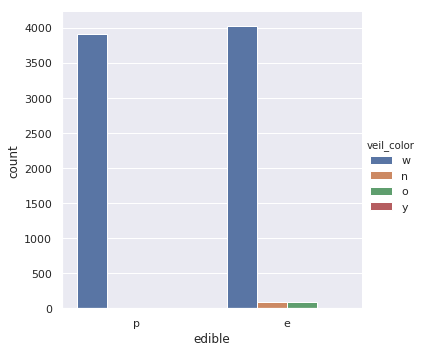

In [17]:
sns.catplot(x="edible", y= None, hue="veil_color", kind="count", data=msamples);

# It is unlikely that this is a good candidate for an explanatory variable, as the distribution of  
#veil color characteristics between poisonous and edible is uniform

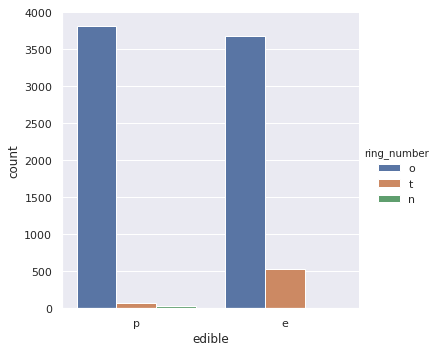

In [18]:
sns.catplot(x="edible", y= None, hue="ring_number", kind="count", data=msamples);

# It is unlikely that this is a good candidate for an explanatory variable, as the distribution of  
#ring number characteristics between poisonous and edible is uniform

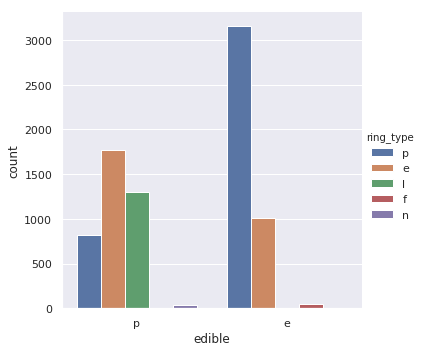

In [19]:
sns.catplot(x="edible", y= None, hue="ring_type", kind="count", data=msamples);

# Ring type could be marginally helpful, there is no confounding on ring type = l

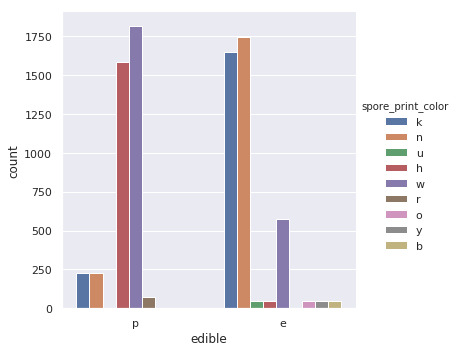

In [20]:
sns.catplot(x="edible", y= None, hue="spore_print_color", kind="count", data=msamples);

# Spore print color looks like it might be good too, there is some crossover between edible, but good separation.

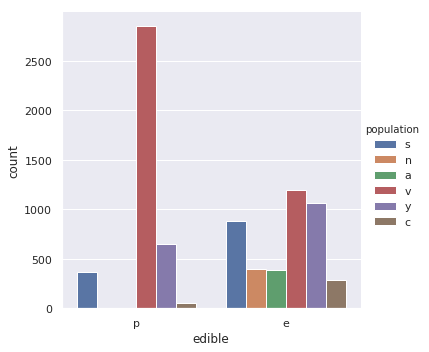

In [21]:
sns.catplot(x="edible", y= None, hue="population", kind="count", data=msamples);

# I dont think that this would be a good choice, even it was correlated with edible, as mushrooms have a way of growing in unexpected places.

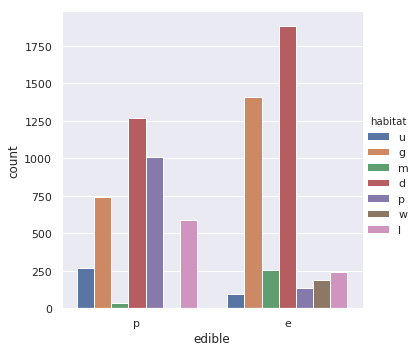

In [22]:
sns.catplot(x="edible", y= None, hue="habitat", kind="count", data=msamples);

# I dont think that this would be a good choice, even it was correlated with edible, as mushrooms have a way of growing in unexpected places.

### Exploratory Analysis Summary:

I think that I have a good chance of accomplishing my goal - to start I am going to use odor, spore color, and stalk surface below ring.

# Classification Workflow


I started by selecting 5 of the 23 features contained within the mushroom data set. My plan while I was assembling my intial writeup was to work with only 3 of the features; odor, spore color, and stalk surface below ring. I decided to incorporate 2 more into my testing, because while I was confident in the heuristic determination made with the bar plots would be directionally correct, I didn't want to limit my analysis too much at the expense of identifying some interesting synergies between features. The features that I selected to test and develop my model were:

- odor
- spore color
- stalk surface below ring
- bruises
- ring type

In addition of this list I wanted to test my hypothesis that the observations I was making based on characteristics exhibited by the bar plots was sound, otherwise I would have likely tested all 22 features. I selected one of the features that I guessed would not prove helpful in solving this classification problem, one with a very uniform distribution between poisonous and edible. With a binary result type (poisonous and edible) the model should at worst return 50% accuracy on average. You can see the result of this experiment in the cell below titled TEST - 51% accuracy. Using this feature to inform our guess is only marginally beneficial (1.2% change), about what I expected.  

With my final list I used a forward stepwise selection method, the single feature analysis is shown in the 5 cells following the TEST cell, labeled ROUND 1. I am assigning 20% of my total record count to the test set.

### TEST

In [88]:
yveil_type,Xveil_type = patsy.dmatrices('C(edible,[[0],[1]]) ~ 0 + veil_type', data = msamples)
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(Xveil_type, yveil_type, test_size=0.20)


LRClassifier = sklearn.linear_model.LogisticRegression(solver = 'saga')
LRModel = LRClassifier.fit(X_train, y_train.ravel())
y_hat = LRModel.predict(X_test)
print('veil_type Score is', LRModel.score(X_test,y_test.ravel()))
print(sklearn.metrics.confusion_matrix(y_hat, y_test))


veil_type Score is 0.512
[[832 793]
 [  0   0]]


### ROUND 1

In [89]:
ybruises,Xbruises = patsy.dmatrices('C(edible,[[0],[1]]) ~ 0 + bruises', data = msamples)
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(Xbruises, ybruises, test_size=0.20)


LRClassifier = sklearn.linear_model.LogisticRegression(solver = 'saga')
LRModel = LRClassifier.fit(X_train, y_train.ravel())
y_hat = LRModel.predict(X_test)
print('Bruises Score is', LRModel.score(X_test,y_test.ravel()))
print(sklearn.metrics.confusion_matrix(y_hat, y_test))
print("Classification Report : ", sklearn.metrics.classification_report(y_hat, y_test))

Bruises Score is 0.7341538461538462
[[541 127]
 [305 652]]
Classification Report :                precision    recall  f1-score   support

         0.0       0.64      0.81      0.71       668
         1.0       0.84      0.68      0.75       957

   micro avg       0.73      0.73      0.73      1625
   macro avg       0.74      0.75      0.73      1625
weighted avg       0.76      0.73      0.74      1625



In [90]:
yodor,Xodor = patsy.dmatrices('C(edible,[[0],[1]]) ~ 0 + odor', data = msamples)
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(Xodor, yodor, test_size=0.20)


LRClassifier = sklearn.linear_model.LogisticRegression(solver = 'saga')
LRModel = LRClassifier.fit(X_train, y_train.ravel())
y_hat = LRModel.predict(X_test)
print('Odor Score is', LRModel.score(X_test,y_test.ravel()))
print(sklearn.metrics.confusion_matrix(y_hat, y_test))
print("Classification Report : ", sklearn.metrics.classification_report(y_hat, y_test))

Odor Score is 0.984
[[847  26]
 [  0 752]]
Classification Report :                precision    recall  f1-score   support

         0.0       1.00      0.97      0.98       873
         1.0       0.97      1.00      0.98       752

   micro avg       0.98      0.98      0.98      1625
   macro avg       0.98      0.99      0.98      1625
weighted avg       0.98      0.98      0.98      1625



In [91]:
ystalk_surface_above_ring,Xstalk_surface_above_ring = patsy.dmatrices('C(edible,[[0],[1]]) ~ 0 + stalk_surface_above_ring', data = msamples)
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(Xstalk_surface_above_ring, ystalk_surface_above_ring, test_size=0.20)


LRClassifier = sklearn.linear_model.LogisticRegression(solver = 'saga')
LRModel = LRClassifier.fit(X_train, y_train.ravel())
y_hat = LRModel.predict(X_test)
print('stalk_surface_above_ring Score is', LRModel.score(X_test,y_test.ravel()))
print(sklearn.metrics.confusion_matrix(y_hat, y_test))
print("Classification Report : ", sklearn.metrics.classification_report(y_hat, y_test))

stalk_surface_above_ring Score is 0.7723076923076924
[[817 340]
 [ 30 438]]
Classification Report :                precision    recall  f1-score   support

         0.0       0.96      0.71      0.82      1157
         1.0       0.56      0.94      0.70       468

   micro avg       0.77      0.77      0.77      1625
   macro avg       0.76      0.82      0.76      1625
weighted avg       0.85      0.77      0.78      1625



In [92]:
yring_type,Xring_type = patsy.dmatrices('C(edible,[[0],[1]]) ~ 0 + ring_type', data = msamples)
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(Xring_type, yring_type, test_size=0.20)


LRClassifier = sklearn.linear_model.LogisticRegression(solver = 'saga')
LRModel = LRClassifier.fit(X_train, y_train.ravel())
y_hat = LRModel.predict(X_test)
print('ring_type Score is', LRModel.score(X_test,y_test.ravel()))
print(sklearn.metrics.confusion_matrix(y_hat, y_test))
print("Classification Report : ", sklearn.metrics.classification_report(y_hat, y_test))

ring_type Score is 0.768
[[631 169]
 [208 617]]
Classification Report :                precision    recall  f1-score   support

         0.0       0.75      0.79      0.77       800
         1.0       0.78      0.75      0.77       825

   micro avg       0.77      0.77      0.77      1625
   macro avg       0.77      0.77      0.77      1625
weighted avg       0.77      0.77      0.77      1625



In [93]:
yspore_print_color,Xspore_print_color = patsy.dmatrices('C(edible,[[0],[1]]) ~ 0 + spore_print_color', data = msamples)
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(Xspore_print_color, yspore_print_color, test_size=0.20)


LRClassifier = sklearn.linear_model.LogisticRegression(solver = 'saga')
LRModel = LRClassifier.fit(X_train, y_train.ravel())
y_hat = LRModel.predict(X_test)
print('spore_print_color Score is', LRModel.score(X_test,y_test.ravel()))
print(sklearn.metrics.confusion_matrix(y_hat, y_test))
print("Classification Report : ", sklearn.metrics.classification_report(y_hat, y_test))

spore_print_color Score is 0.872
[[761  96]
 [112 656]]
Classification Report :                precision    recall  f1-score   support

         0.0       0.87      0.89      0.88       857
         1.0       0.87      0.85      0.86       768

   micro avg       0.87      0.87      0.87      1625
   macro avg       0.87      0.87      0.87      1625
weighted avg       0.87      0.87      0.87      1625



### Round 2

After the first round, I selected the model with the best performance - I stuck with the logistic regression approach during all of this testing and development, thinking that would provide a consistent benchmark, though in later testing I apply KNN and decision tree methods. I gathered the model that perfomed the best, odor (accuracy 98.4% STRONGLY CORRELATED), and then tested the accuracy with each of the 4 remaining features to identify the top performer. This work is shown in the cell below - remaining is the top performing round 2 model (accuracy 99.3%). 

I had a goal of building a model that allowed for > 99.9% accuracy, because less than 1 in 1000 seemed like a pretty solid prediction, so I was hopeful that I could gain the <.7% accuracy with the addition of another feature. But piling on more than one more feature was not would not add much value, diminishing returns and unnecessary complexity.


In [94]:
# ************************Now we have the winning model X remaining features*****************8

yodor__spore_print_color,Xodor__spore_print_color = patsy.dmatrices('C(edible,[[0],[1]]) ~ 0 + odor*spore_print_color', data = msamples)
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(Xodor__spore_print_color, yodor__spore_print_color, test_size=0.20)


LRClassifier = sklearn.linear_model.LogisticRegression(solver = 'saga')
LRModel = LRClassifier.fit(X_train, y_train.ravel())
y_hat = LRModel.predict(X_test)
print('odor|spore_print_color Score is', LRModel.score(X_test,y_test.ravel()))
print(sklearn.metrics.confusion_matrix(y_hat, y_test))
print("Classification Report : ", sklearn.metrics.classification_report(y_hat, y_test))

odor|spore_print_color Score is 0.9938461538461538
[[833  10]
 [  0 782]]
Classification Report :                precision    recall  f1-score   support

         0.0       1.00      0.99      0.99       843
         1.0       0.99      1.00      0.99       782

   micro avg       0.99      0.99      0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625



### Round 3

The goal of 99.9% accuracy was much harder to hit than I expected. I tested the accuracy of the winning round 2 model, odor and spore print color, with not only the remaining 3 features, but all of the remaining 17 features (just to make sure) and was unable to break the 99.57 mark. The winning round 3 model was odor, spore print color, and stalk surface above ring.

In [98]:
# ************************2nd Time Now we have the winning model X remaining features*****************8

y,X = patsy.dmatrices('C(edible,[[0],[1]]) ~ 0 + odor*spore_print_color*stalk_surface_above_ring', data = msamples)
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.20)


LRClassifier = sklearn.linear_model.LogisticRegression(solver = 'saga')
LRModel = LRClassifier.fit(X_train, y_train.ravel())
y_hat = LRModel.predict(X_test)
print('odor|spore_print_color|stalk_surface_above_ring Score is', LRModel.score(X_test,y_test.ravel()))
print(sklearn.metrics.confusion_matrix(y_hat, y_test))
print("Classification Report : ", sklearn.metrics.classification_report(y_hat, y_test))

odor|spore_print_color|stalk_surface_above_ring Score is 0.9956923076923077
[[818   7]
 [  0 800]]
Classification Report :                precision    recall  f1-score   support

         0.0       1.00      0.99      1.00       825
         1.0       0.99      1.00      1.00       800

   micro avg       1.00      1.00      1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



### Next Steps

After I pushed the logistic regression as far as I could, but wasn't really confident that the other methods would provide an improvement in terms of accuracy, but would likely just vary in relation to their processing times. In the next two cells I applied the K nearest neighbors and decision tree methods, and they will consistently provide the exact same accuracy and decisioning as the logistic regression model, seen in the confusion matrix. 

In [99]:
KNNClassifier = sklearn.neighbors.KNeighborsClassifier(n_neighbors=1)
KNNModel = KNNClassifier.fit(X_train, y_train.ravel())
y_hat = KNNModel.predict(X_test)
print('Score is', KNNModel.score(X_test,y_test.ravel()))
print(sklearn.metrics.confusion_matrix(y_hat, y_test))
print("Classification Report : ", sklearn.metrics.classification_report(y_hat, y_test))

Score is 0.9956923076923077
[[818   7]
 [  0 800]]
Classification Report :                precision    recall  f1-score   support

         0.0       1.00      0.99      1.00       825
         1.0       0.99      1.00      1.00       800

   micro avg       1.00      1.00      1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [100]:
DTClassifier = sklearn.tree.DecisionTreeClassifier()
DTModel = DTClassifier.fit(X_train, y_train.ravel())
y_hat = DTModel.predict(X_test)
print('Score is', DTModel.score(X_test,y_test.ravel()))
print(sklearn.metrics.confusion_matrix(y_hat, y_test))
print("Classification Report : ", sklearn.metrics.classification_report(y_hat, y_test))

Score is 0.9956923076923077
[[818   7]
 [  0 800]]
Classification Report :                precision    recall  f1-score   support

         0.0       1.00      0.99      1.00       825
         1.0       0.99      1.00      1.00       800

   micro avg       1.00      1.00      1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



### Conclusion

In conclusion, you can classify to a reasonable level of accuracy (99.6%) with 2 to 3 features, with this dataset there were only this many that held any relational significance to edible feature. Still, I did not achieve my goal of 99.9% accuracy. The benefit of this model is that the failures in the classification are false negatives (determining that a mushroom is poisonous when its edible) rather than false positives (determining a musroom is edible when it is poisonous. So, really if you are just focused on 'determining whether a mushroom is edible, the model has 100% accuracy.

Maybe I did accomplish my goal after all!